# Overlapping Community Detection (*Using attribute information*)

# Loading Data

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
def load_graph_data(file_path):
    with open(file_path, 'r') as file:
        graph_data = [tuple(map(int, line.strip().split())) for line in file]
    return graph_data

def load_feature_data(file_path):
    with open(file_path, 'r') as file:
        feature_data = [line.strip().split() for line in file]

    # Separate paper_id, binary vector, and class label
    paper_ids = [int(line[0]) for line in feature_data]
    binary_vectors = [list(map(int, line[1:-1])) for line in feature_data]
    class_labels = [line[-1] for line in feature_data]

    return paper_ids, binary_vectors, class_labels

def create_graph(graph_data):
    G = nx.Graph()
    G.add_edges_from(graph_data)
    return G

def assign_attributes(graph, p,b):
    for i in range(len(p)):
        graph.nodes[p[i]]["features"] = b[i]
    return graph

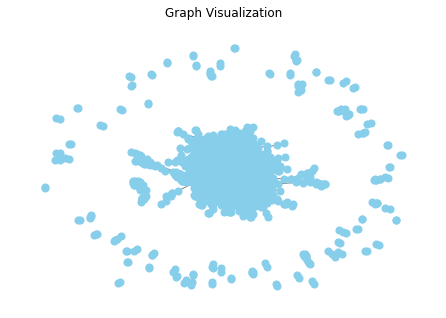

In [2]:
# Load the dataset
graph_data = load_graph_data("cora.cites")
paper_ids, binary_vectors, class_labels = load_feature_data("cora.content")

g = create_graph(graph_data)
G = assign_attributes(g, paper_ids, binary_vectors)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False,node_size=50, font_size=8, node_color='skyblue', edge_color='gray')
plt.title("Graph Visualization")
plt.show()


# Visualization function

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def visualize_communities(G, partition,s):
    pos = nx.spring_layout(G)  # You can choose a different layout if needed

    # Assign unique colors to communities
    community_colors = {}
    for node, community_id in partition.items():
        if community_id not in community_colors:
            community_colors[community_id] = np.random.rand(3,)
    
    # Get colors for each node based on their community
    node_colors = [community_colors[partition[node]] for node in G.nodes]

    # Visualize the graph
    nx.draw(G, pos, nodelist=G.nodes, node_color=node_colors, with_labels=False, cmap=plt.cm.Blues)

    # Set the title of the plot
    plt.title(s)

    # Display the plot
    plt.show()
def print_communities(partition):
    communities = {}
    for node, community_id in partition.items():
        if community_id not in communities:
            communities[community_id] = [node]
        else:
            communities[community_id].append(node)
    com = sorted(communities.items(), key=lambda x: x[0])
    for community_id, nodes in com:
        print(f"Community {community_id}: {nodes}")

# Cosine Similarity 

In [5]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have loaded your feature data into a variable named feature_data
# feature_data should be a list where each element is a tuple (paper_id, binary_attribute_vector)
def fd(file_path):
    with open(file_path, 'r') as file:
        feature_data = [line.strip().split()[:-1] for line in file]

    return feature_data
feature_data=fd('cora.content')
attribute_vectors = np.array(feature_data)

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(attribute_vectors)

# Print or use the similarity matrix as needed
print("Similarity Matrix:")
print(similarity_matrix)



Similarity Matrix:
[[1.         0.99999999 0.99999999 ... 0.99999999 0.99999999 0.99999997]
 [0.99999999 1.         1.         ... 1.         1.         0.99999998]
 [0.99999999 1.         1.         ... 1.         1.         0.99999998]
 ...
 [0.99999999 1.         1.         ... 1.         1.         0.99999998]
 [0.99999999 1.         1.         ... 1.         1.         0.99999998]
 [0.99999997 0.99999998 0.99999998 ... 0.99999998 0.99999998 1.        ]]


# InfoMap algorithm

In [11]:
import infomap
import networkx as nx
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import community
def preprocess_graph_for_infomap(G, similarity_matrix):
    for i, node_id in enumerate(G.nodes):
        G.nodes[node_id]['attribute_sim'] = similarity_matrix[i]

def infomap_with_attribute_similarity(G):
    # Create Infomap instance
    im = infomap.Infomap()

    # Add nodes and links to Infomap
    for edge in G.edges:
        im.addLink(*edge)

    for node_id in G.nodes:
        attribute_sim = G.nodes[node_id]['attribute_sim']
        im.addNode(node_id, str(attribute_sim))  # Convert attribute_sim to string

    # Run the Infomap algorithm
    im.run()

    # Get the partition
    partition = im.getModules()

    return partition

# Assuming G and similarity_matrix are already defined
# Apply Infomap with attribute similarity
preprocess_graph_for_infomap(G, similarity_matrix)
partition = infomap_with_attribute_similarity(G)

print_communities(partition)


Community 1: [35, 40, 463, 1026, 1033, 1034, 1035, 1688, 1694, 1817, 6346, 8865, 8872, 8874, 8875, 9586, 12558, 12576, 13652, 13654, 13656, 13658, 14062, 15670, 18582, 19045, 22229, 22241, 28230, 28287, 28290, 28336, 28851, 32083, 33818, 33823, 33895, 33904, 33907, 35061, 35852, 38205, 39474, 41714, 41732, 44368, 44455, 44514, 45599, 45603, 45605, 46079, 48764, 48766, 48768, 48781, 54129, 54131, 54132, 56112, 56115, 56119, 56708, 56709, 57119, 58436, 58453, 58454, 58758, 59715, 61069, 61073, 61312, 62329, 62634, 62718, 63832, 66556, 66563, 66564, 69284, 69296, 70970, 78508, 78511, 78549, 78552, 78555, 78557, 80656, 81714, 81722, 82920, 83725, 83746, 84021, 85299, 85324, 85352, 87363, 87417, 94639, 94641, 96845, 96847, 96851, 97390, 97645, 98693, 98698, 100935, 103515, 108047, 110041, 116545, 116552, 116553, 117315, 117316, 118873, 119686, 124952, 127033, 128540, 132806, 134199, 134219, 135130, 141324, 141342, 141347, 144212, 144679, 144701, 148170, 148341, 152483, 164885, 175256, 17799

c:\users\91938\appdata\local\programs\python\python39\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


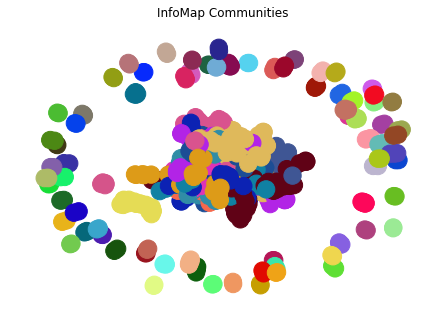

In [9]:
visualize_communities(G, partition,"InfoMap Communities")

In [23]:
modularity = community.modularity(partition, G)
print("Modularity:", modularity)

Modularity: 0.85451632


In [24]:
def calculate_conductance(graph, community_nodes):
    cut_edges = 0
    internal_edges = 0
    external_edges = 0

    for node in community_nodes:
        for neighbor in graph.neighbors(node):
            if neighbor in community_nodes:
                internal_edges += 1
            else:
                external_edges += 1

    cut_edges = external_edges
    conductance = cut_edges / (2 * internal_edges + cut_edges)

    return conductance

# Example usage:
# Assuming 'G' is your networkx graph and 'community_nodes' is a list of nodes in the community ω.
conductance_value = calculate_conductance(G, partition)
print("Conductance:", conductance_value)


Conductance: 0.352682614


# COPRA algorithm

In [14]:
import community
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
def load_graph_data(file_path):
    with open(file_path, 'r') as file:
        graph_data = [tuple(map(int, line.strip().split())) for line in file]
    return graph_data

def load_feature_data(file_path):
    with open(file_path, 'r') as file:
        feature_data = [line.strip().split() for line in file]

    # Separate paper_id, binary vector, and class label
    paper_ids = [int(line[0]) for line in feature_data]
    binary_vectors = [list(map(int, line[1:-1])) for line in feature_data]
    class_labels = [line[-1] for line in feature_data]

    return paper_ids, binary_vectors, class_labels

def create_graph(graph_data):
    G = nx.Graph()
    G.add_edges_from(graph_data)
    return G

def assign_attributes(graph, p,b):
    for i in range(len(p)):
        graph.nodes[p[i]]["features"] = b[i]
    return graph
def apply_copra(G, alpha=0.3, max_iter=100):
    # Initialize communities
    communities = {node: [node] for node in G.nodes}

    # Perform label propagation
    for _ in range(max_iter):
        for node in G.nodes:
            neighbor_communities = [communities[neighbor] for neighbor in G.neighbors(node)]
            neighbor_communities = [item for sublist in neighbor_communities for item in sublist]  # Flatten

            probabilities = (1 - alpha) * G.degree(node) + alpha * np.bincount(neighbor_communities)
            most_probable_community = np.argmax(probabilities)

            communities[node] = [node, most_probable_community]

    # Merge overlapping communities
    merged_communities = []
    for community in communities.values():
        if community not in merged_communities:
            merged_communities.append(community)

    return merged_communities

# Assuming G is the graph
copra_communities = apply_copra(G)


# Print and visualize the communities
print_communities(partition)


Community 0: [35, 103515, 1050679, 1103960, 1103985, 1109199, 1113831, 1114331, 1117476, 1119505, 1119708, 1127430, 1127913, 1128204, 1128227, 1128314, 1128945, 1128985, 1129018, 1129027, 1129683, 1129778, 1130847, 1130856, 1131116, 1131360, 1131752, 1133338, 1136814, 1137466, 1152421, 1152508, 1153065, 1153280, 1153577, 1153853, 1153943, 1154176, 1154459, 116552, 128540, 132806, 141342, 141347, 148170, 15670, 1688, 178727, 18582, 198653, 206371, 210871, 231249, 248425, 254923, 259701, 259702, 273152, 287787, 28851, 307015, 335733, 33904, 33907, 38205, 387795, 415693, 427606, 44368, 45599, 46079, 48766, 503883, 503893, 513189, 54129, 54131, 561238, 568857, 573964, 573978, 574009, 574264, 574462, 575077, 575292, 575331, 576725, 576795, 577227, 578780, 579008, 592973, 593091, 593105, 593260, 593813, 594543, 594649, 594900, 608326, 634902, 634904, 634938, 634975, 640617, 646809, 646837, 647447, 66556, 66563, 69284, 69296, 694759, 787016, 81722, 84021, 85352, 97645, 98698, 40, 1109017, 111

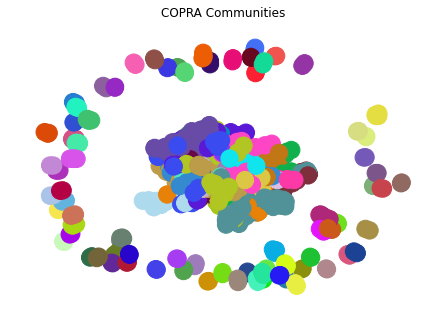

In [15]:
visualize_communities(G, partition,"COPRA Communities")

In [25]:
modularity = community.modularity(partition, G)
print("Modularity:", modularity)

Modularity: 0.71615374


In [26]:
conductance_value = calculate_conductance(G, partition)
print("Conductance:", conductance_value)

Conductance: 0.41725263


# Compare

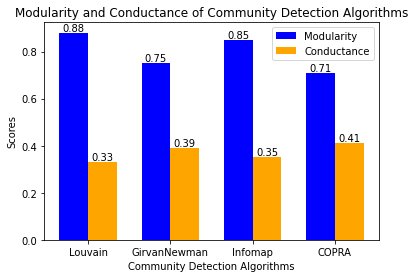

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these values with your actual modularity and conductance values
algorithm_names = ['Louvain', 'GirvanNewman', 'Infomap', 'COPRA']
modularity_values = [0.88, 0.75, 0.85, 0.71]
conductance_values = [0.33, 0.39, 0.35, 0.41]

# Set up the positions for the grouped bars
bar_width = 0.35
index = np.arange(len(algorithm_names))

# Plotting the grouped bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(index, modularity_values, bar_width, label='Modularity', color='blue')
bar2 = ax.bar(index + bar_width, conductance_values, bar_width, label='Conductance', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Community Detection Algorithms')
ax.set_ylabel('Scores')
ax.set_title('Modularity and Conductance of Community Detection Algorithms')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(algorithm_names)
ax.legend()

# Display the values on top of the bars
for bar in bar1 + bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()
